## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

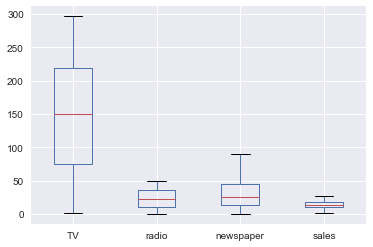

In [4]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

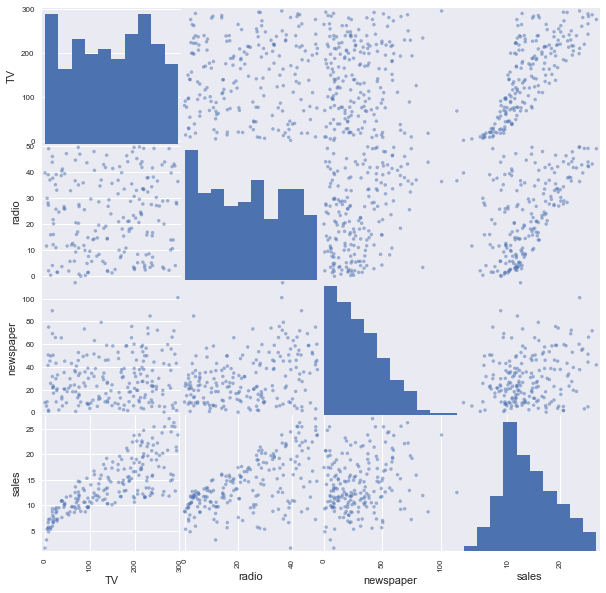

In [6]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(10,10))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [7]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [8]:
y = df.sales

b) Set X to be just the features described above in df

In [9]:
x = df.drop(['sales'],1)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

d) Train model on training data, and make predictions on testing data

In [11]:
regr = LinearRegression()
regr.fit(x_train,y_train)
regr.predict(x_test)


array([ 16.4080242 ,  20.88988209,  21.55384318,  10.60850256,
        22.11237326,  13.10559172,  21.05719192,   7.46101034,
        13.60634581,  15.15506967,   9.04831992,   6.65328312,
        14.34554487,   8.90349333,   9.68959028,  12.16494386,
         8.73628397,  16.26507258,  10.27759582,  18.83109103,
        19.56036653,  13.25103464,  12.33620695,  21.30695132,
         7.82740305,   5.80957448,  20.75753231,  11.98138077,
         9.18349576,   8.5066991 ,  12.46646769,  10.00337695,
        21.3876709 ,  12.24966368,  18.26661538,  20.13766267,
        14.05514005,  20.85411186,  11.0174441 ,   4.56899622])

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [12]:
print("R squared =",regr.score(x_test,y_test),". It is relatively good, since it is close to 1.")

R squared = 0.899438024101 . It is relatively good, since it is close to 1.


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

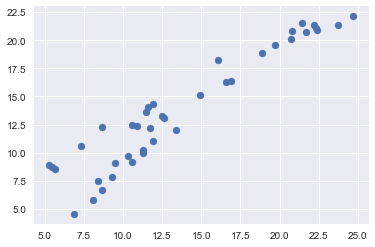

Most of points fit on the y=x line, so it looks good


In [14]:
plt.scatter(y_test,regr.predict(x_test))
plt.show()
print("Most of points fit on the y=x line, so it looks good")

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [15]:
print("The coefficients are",regr.coef_,"The second coefficient is much higher than the other two, we need to standardize our data before making conclusions and see if there are colineality.")

The coefficients are [ 0.04472952  0.18919505  0.00276111] The second coefficient is much higher than the other two, we need to standardize our data before making conclusions and see if there are colineality.


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [16]:
print("The data is not standardized, so the result is not reliable")
from sklearn import preprocessing
yscale=preprocessing.scale(y)
xscale=preprocessing.scale(x)
from sklearn.model_selection import train_test_split
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(
    xscale, yscale, test_size=0.2, random_state=42)

regr_s = LinearRegression()
regr_s.fit(x_train_s,y_train_s)
regr_s.predict(x_test_s)
regr_s.coef_



The data is not standardized, so the result is not reliable


array([ 0.73603268,  0.53837398,  0.0115254 ])

In [17]:
print("Therefore, newspaper has a very low influence on sales,TV and radio are more important features.")


Therefore, newspaper has a very low influence on sales,TV and radio are more important features.


## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

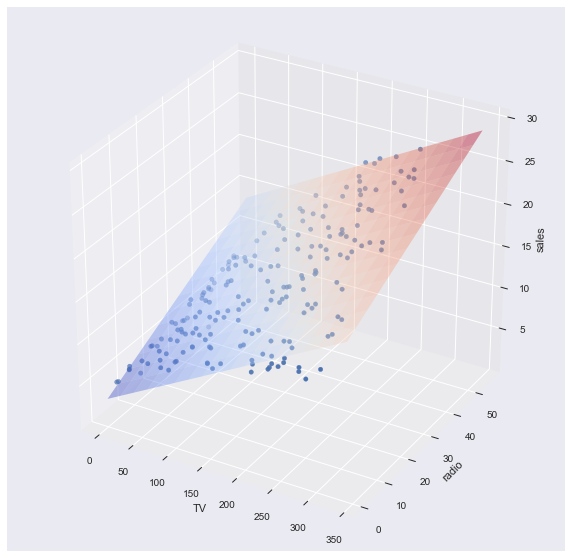

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
x_2 = x.drop(['newspaper'],1)
y_2 = y
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    x_2, y_2, test_size=0.2, random_state=42)
regr_2 = LinearRegression()
regr_2.fit(x_train_2,y_train_2)
regr_2.predict(x_test_2)

xx_2, yy_2 = np.meshgrid(np.arange(0, 350, 20), np.arange(0,60,4))
df_2 = pd.core.frame.DataFrame({'TV': xx_2.ravel(), 'radio': yy_2.ravel()})
z_2 = regr_2.predict(df_2) 


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_2['TV'],x_2['radio'],y_2)
ax.plot_surface(xx_2, yy_2, z_2.reshape(xx_2.shape),rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

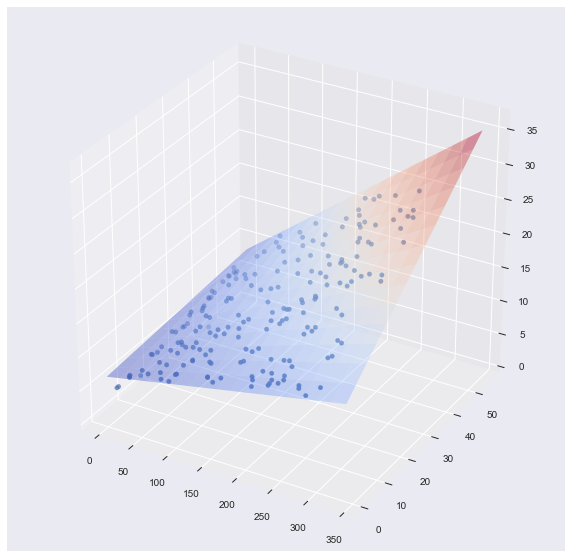

In [20]:
# Insert TV * radio
x_2['TVr']= x_2['TV']*x_2['radio']
x_3 = x_2
y_3 = y
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(
    x_3, y_3, test_size=0.2, random_state=42)
regr_3 = LinearRegression()
regr_3.fit(x_train_3,y_train_3)
regr_3.predict(x_test_3)
regr_3.coef_
xx_3,yy_3 = np.meshgrid(np.arange(0, 350, 20), np.arange(0,60,4))
xy_3 = xx_3*yy_3
df_3= pd.core.frame.DataFrame({'TV': xx_3.ravel(), 'radio': yy_3.ravel(),'tvr':xy_3.ravel()})
z_3 = regr_3.predict(df_3)
fig = plt.figure(figsize =(10,10))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x_3['TV'],x_3['radio'],y_3)
ax.plot_surface(xx_3, yy_3, z_3.reshape(xx_3.shape),rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)


plt.show()


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.041077716587682944, m = 1.478684735387264, error = 112.64345199560078


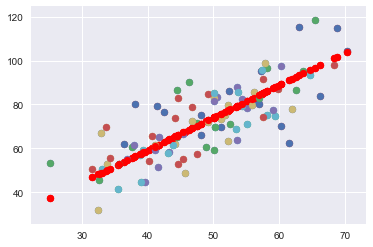

In [21]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations,learning_rate):
    points = genfromtxt("C:\\Users\\admin\\Desktop\\4990\\data\\data.csv", delimiter=",")
    #learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100,0.0001)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -2.1858247925415498e+167, m = -1.1121132929727182e+169, error = inf


C:\Users\admin\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


When learning rate is 0.01, it does not converge.


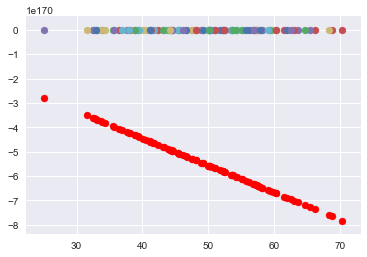

In [26]:
run(100,0.01)
print("When learning rate is 0.01, it does not converge.")

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


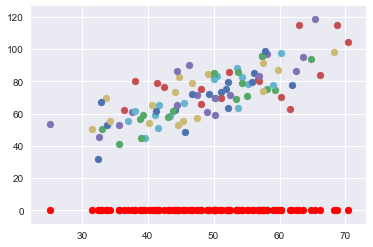

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.04364103033221188, m = 2.2112108920773155, error = 1449.470665944242


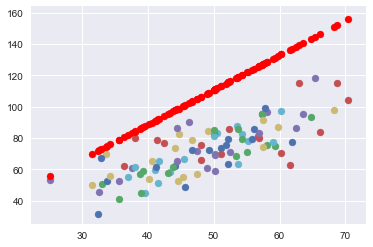

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02230154530752014, m = 1.1163155208543771, error = 440.40873307583655


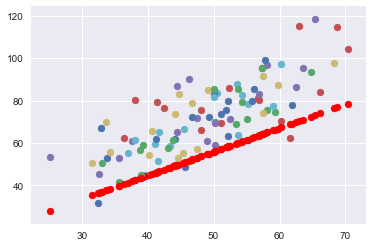

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.03313742084325126, m = 1.6584521225999558, error = 193.00931549266681


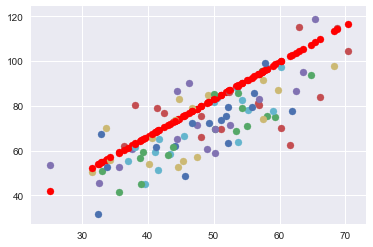

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.02804152953341927, m = 1.3900056799720335, error = 132.3524498162109


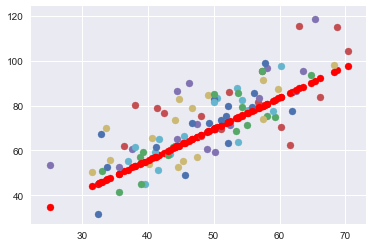

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.030834311319764406, m = 1.5229227311358462, error = 117.48066610837672


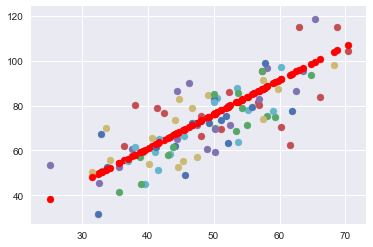

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.029720978410872838, m = 1.4571030148314494, error = 113.8343567768524


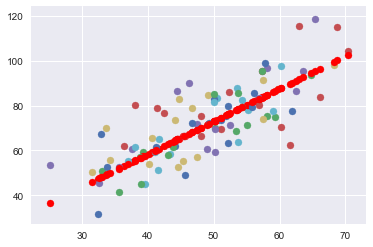

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.030541767989166777, m = 1.4896886179609883, error = 112.94028179073236


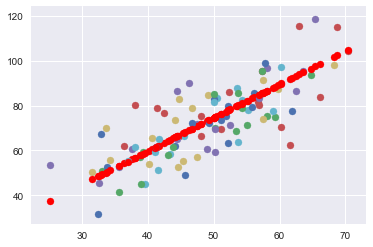

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.03040486284286565, m = 1.4735484267615937, error = 112.72099289110427


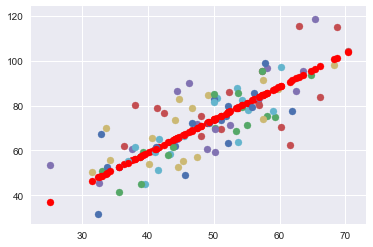

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.030742158034849188, m = 1.4815350110687533, error = 112.66714639683582


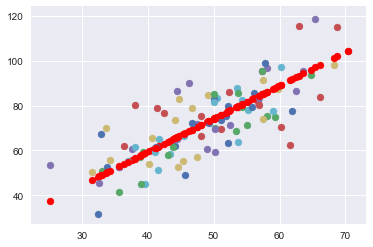

If the learning rate is smaller than 0.0001, the converge takes longer, if the learning rate is bigger than 0.0001, it never converges.


In [35]:
# Use this to visually discuss convergence rate based on learning rate
# A Good Learning Rate
for num in range(0,10):
    run(num,0.0001)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


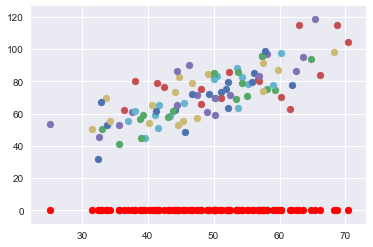

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.07273505055368648, m = 3.685351486795526, error = 12248.923658059466


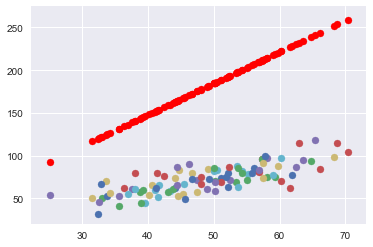

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.03503133043958161, m = -1.812925535576324, error = 27125.9989614646


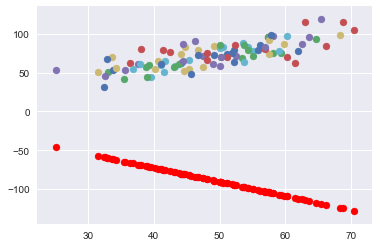

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.12649657885967047, m = 6.390068174869519, error = 60239.92274554496


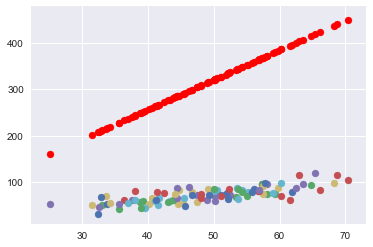

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.11374200683340807, m = -5.848185220212095, error = 133946.07277683076


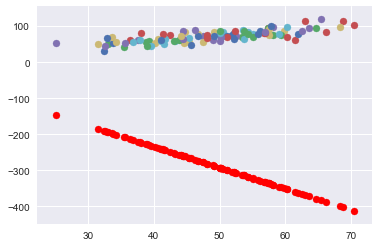

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.24542423466870028, m = 12.410337296692443, error = 298003.84433146904


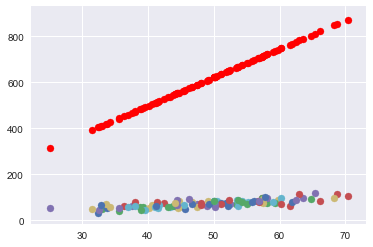

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.28967567003687617, m = -14.829995329449478, error = 663169.4699413386


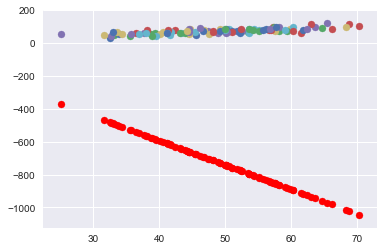

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.5094010313993653, m = 25.81048099761001, error = 1475968.1128761834


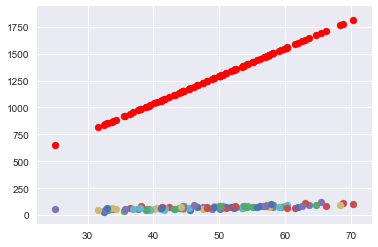

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.6820116610464277, m = -34.822013381765444, error = 3285124.253337868


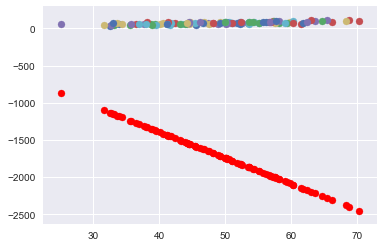

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.096233422691767, m = 55.6370121244165, error = 7312008.363935543


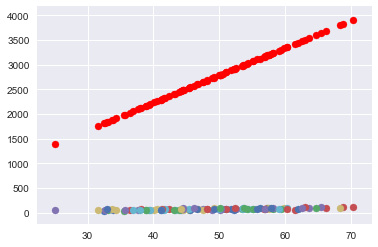

In [36]:
# Diverge
for num in range(0,10):
    run(num,0.0005)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


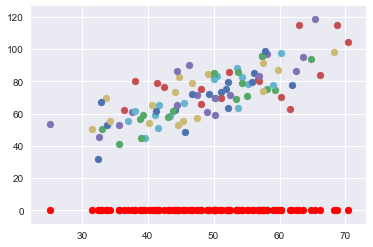

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


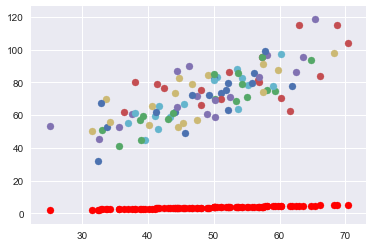

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


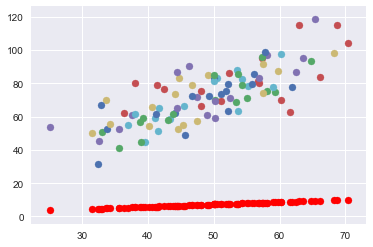

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


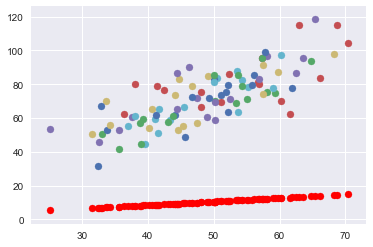

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


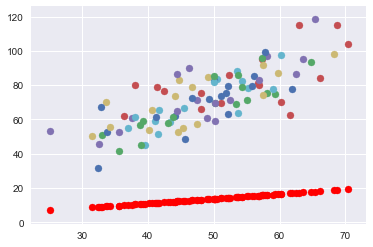

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


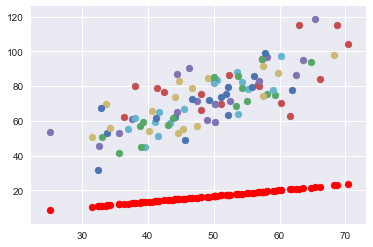

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


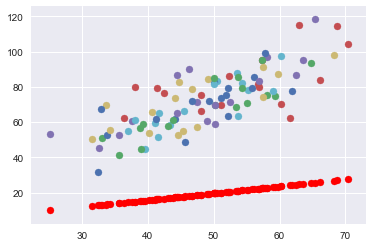

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


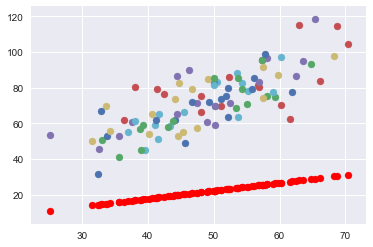

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


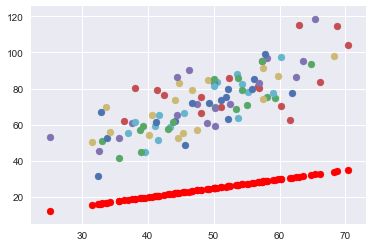

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


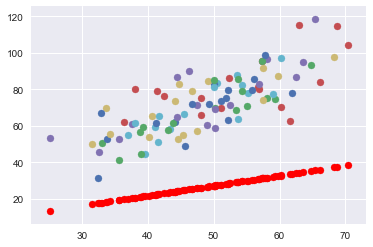

In [37]:
#An Inefficient Learning Rate
for num in range(0,10):
    run(num,0.00001)
    plt.show()

In [38]:
print("If the learning rate is smaller than 0.0001, the converge takes longer, if the learning rate is bigger than 0.0005, it never converges.")
print("Since learning rate is a step size, if the step size is too large, then it will bypass the optimal solution and leads to a converge scenario, if the step is too small, then it will take more time to the optimal solution.")

If the learning rate is smaller than 0.0001, the converge takes longer, if the learning rate is bigger than 0.0005, it never converges.
Since learning rate is a step size, if the step size is too large, then it will bypass the optimal solution and leads to a converge scenario, if the step is too small, then it will take more time to the optimal solution.


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

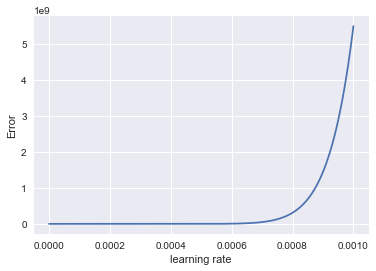

In [48]:
import numpy as np
points = genfromtxt("C:\\Users\\admin\\Desktop\\4990\\data\\data.csv", delimiter=",")
initial_b =0
initial_m=0
errors=[]
num_iterations = 5
for learning_rate in np.linspace(0,0.001,300):
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        errors.append(compute_error_for_line_given_points(b, m, points))
plt.xlabel("learning rate")
plt.ylabel("Error")        
plt.plot(np.linspace(0,0.001,300),errors)

In [49]:
print("Based on the plot, we can choose learning rate = 0.0002.")

Based on the plot, we can choose learning rate = 0.0002.
